In [46]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [47]:
zip_code = "data_set/zip_code.csv"
zip_code_df = pd.read_csv(zip_code)
zip_code_df.head()

,ZIP,Neighborhood,Borough,Cases,"Cases per 100,000","Deaths per 100,000",Percent positive<br>(of people tested)
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,420,1782.45,106.10,6.95
1,10002,Chinatown/Lower East Side,Manhattan,1237,1611.61,208.45,10.00
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,516,959.08,63.20,5.39
3,10004,Financial District,Manhattan,39,1068.32,27.39,6.04
4,10005,Financial District,Manhattan,81,964.73,23.82,5.31


In [48]:
median = "data_set/median_incomes.csv"
median_income_df = pd.read_csv(median, quoting=csv.QUOTE_MINIMAL, skipinitialspace=True, )
median_income_df.head()

,Location,Household Type,TimeFrame,DataFormat,Data,Fips
0,Riverdale,All Households,2005,Dollars,60686.21876,208
1,Williamsbridge,All Households,2005,Dollars,49881.99032,212
2,Throgs Neck,All Households,2005,Dollars,55211.28961,210
3,Pelham Parkway,All Households,2005,Dollars,50494.64003,211
4,Morrisania,All Households,2005,Dollars,23524.24268,203


In [49]:
median_income_df.dtypes

Location           object
Household Type     object
TimeFrame           int64
DataFormat         object
Data              float64
Fips                int64
dtype: object

In [50]:
household = median_income_df.loc[(median_income_df['Household Type'] == 'All Households')]
household.head()

,Location,Household Type,TimeFrame,DataFormat,Data,Fips
0,Riverdale,All Households,2005,Dollars,60686.21876,208
1,Williamsbridge,All Households,2005,Dollars,49881.99032,212
2,Throgs Neck,All Households,2005,Dollars,55211.28961,210
3,Pelham Parkway,All Households,2005,Dollars,50494.64003,211
4,Morrisania,All Households,2005,Dollars,23524.24268,203


In [52]:
time = household.loc[(household["TimeFrame"] == 2018)]
time.tail()

,Location,Household Type,TimeFrame,DataFormat,Data,Fips
3440,Brooklyn,All Households,2018,Dollars,61220.0,36047
3441,Manhattan,All Households,2018,Dollars,85066.0,36061
3442,Queens,All Households,2018,Dollars,69320.0,36081
3443,Staten Island,All Households,2018,Dollars,82166.0,36085
3444,New York City,All Households,2018,Dollars,63799.0,3651000


In [53]:
boroughs = time.tail(6)
boroughs

,Location,Household Type,TimeFrame,DataFormat,Data,Fips
3439,Bronx,All Households,2018,Dollars,38467.0,36005
3440,Brooklyn,All Households,2018,Dollars,61220.0,36047
3441,Manhattan,All Households,2018,Dollars,85066.0,36061
3442,Queens,All Households,2018,Dollars,69320.0,36081
3443,Staten Island,All Households,2018,Dollars,82166.0,36085
3444,New York City,All Households,2018,Dollars,63799.0,3651000


In [54]:
borough = boroughs.drop(['Household Type', 'DataFormat', 'TimeFrame', 'Fips'], axis=1)

borough.columns = ["Borough", "average_household_income"]
borough

,Borough,average_household_income
3439,Bronx,38467.0
3440,Brooklyn,61220.0
3441,Manhattan,85066.0
3442,Queens,69320.0
3443,Staten Island,82166.0
3444,New York City,63799.0


In [55]:
#spec_chars = [",", "$"]


#for char in spec_chars:
    #borough['average_household_income'] = borough['average_household_income'].str.replace(char,'')

borough.head()

,Borough,average_household_income
3439,Bronx,38467.0
3440,Brooklyn,61220.0
3441,Manhattan,85066.0
3442,Queens,69320.0
3443,Staten Island,82166.0


In [56]:
#borough['average_household_income'] = borough['average_household_income'].str.split().str.join("")

In [57]:
borough.head()

,Borough,average_household_income
3439,Bronx,38467.0
3440,Brooklyn,61220.0
3441,Manhattan,85066.0
3442,Queens,69320.0
3443,Staten Island,82166.0


In [60]:
by_boro = "data_set/by-boro.csv"
by_boro_df = pd.read_csv(by_boro)
by_boro_df = by_boro_df.rename(columns={"BOROUGH_GROUP":"Borough"})

In [61]:
df_merge = pd.merge(by_boro_df, borough, on='Borough')
df_merge.head()

,Borough,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,average_household_income
0,Bronx,3494.37,883.30,274.70,50044,12650,3934,38467.0
1,Brooklyn,2403.26,612.78,217.78,62072,15827,5625,61220.0
2,Manhattan,1772.15,502.24,153.99,28863,8180,2508,85066.0
3,Queens,2970.68,760.41,261.57,67699,17329,5961,69320.0
4,Staten Island,3078.04,507.37,188.16,14657,2416,896,82166.0


In [81]:
#case_income = plt.scatter(df_merge.CASE_COUNT, df_merge.average_household_income, marker="o", facecolors="red", edgecolors="black")
#plt.title("Case Count vs Avg Household Income")
#plt.xlabel("Case Count")
#plt.ylabel("Avg Household Income")
#plt.annotate("  Bronx", (50044, 38467.00))
#plt.annotate("  Brooklyn", (62072, 61220.0))
#plt.annotate("  Manhattan", (28863, 85066.00))
#plt.annotate("Queens", (67699, 69320.00))
#plt.annotate("  Staten Island", (14657, 82166.00))

#plt.ylim(35000,90000)
#plt.savefig('Data_PNG/case_count_vs_income.png')
#plt.show()


(35000.0, 85000.0)

<IPython.core.display.Javascript object>


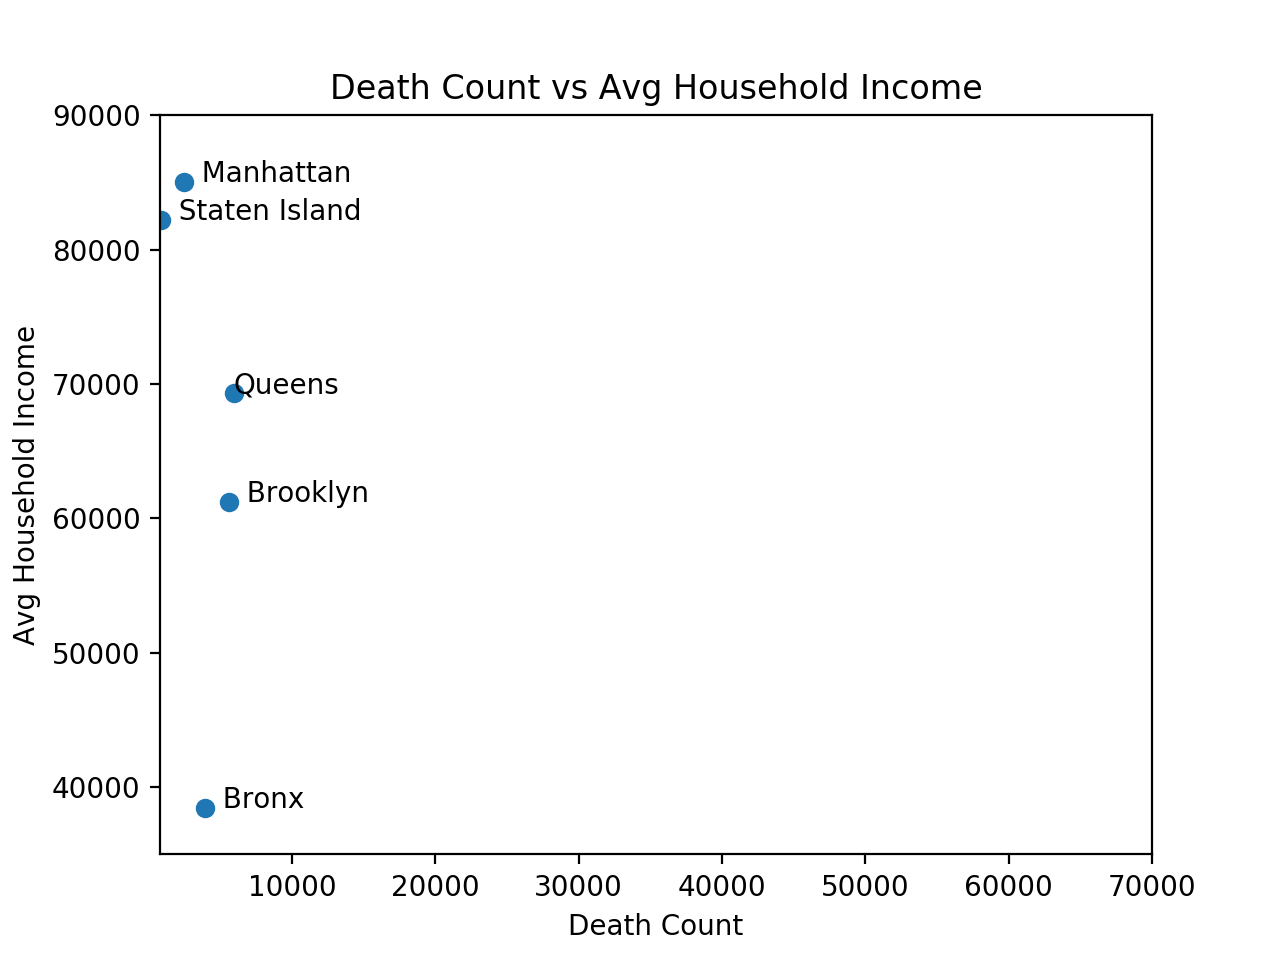

In [86]:
plt.scatter(df_merge.DEATH_COUNT, df_merge.average_household_income)
plt.title("Death Count vs Avg Household Income")
plt.xlabel("Death Count")
plt.ylabel("Avg Household Income")
plt.annotate("  Bronx", (3934, 38467.00))
plt.annotate("  Brooklyn", (5625, 61220.0))
plt.annotate("  Manhattan", (2508, 85066.00))
plt.annotate("Queens", (5961, 69320.00))
plt.annotate("  Staten Island", (896, 82166.00))

plt.ylim(35000,90000)
plt.xlim(800,70000)
#plt.savefig('Data_PNG/death_count_vs_income.png')
plt.show()


In [26]:
plt.scatter(df_merge.HOSPITALIZED_COUNT, df_merge.average_household_income)